# Comparative analysis of OpenVisus with Xarray and without Xarray

In [99]:
from xarray_files import *
from OpenVisus import *

In [100]:
import matplotlib.pyplot as plt
def ShowData(data):
    fig = plt.figure(figsize = (70,20))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(data, origin='lower')
    plt.show()
    

### Opening dataset with  Openvisus engine in xarray

[11, 21, 43200, 86400, 3]
Adding field data shape [11, 21, 43200, 86400, 3] dtype uint8 labels ['time', 'resolution', 'y', 'x', 'channel'] timesteps 11 Max Resolution 33
_raw_indexing_method key (10, 20, slice(2, 33000, 1), slice(2, 27000, 1), slice(None, None, None))


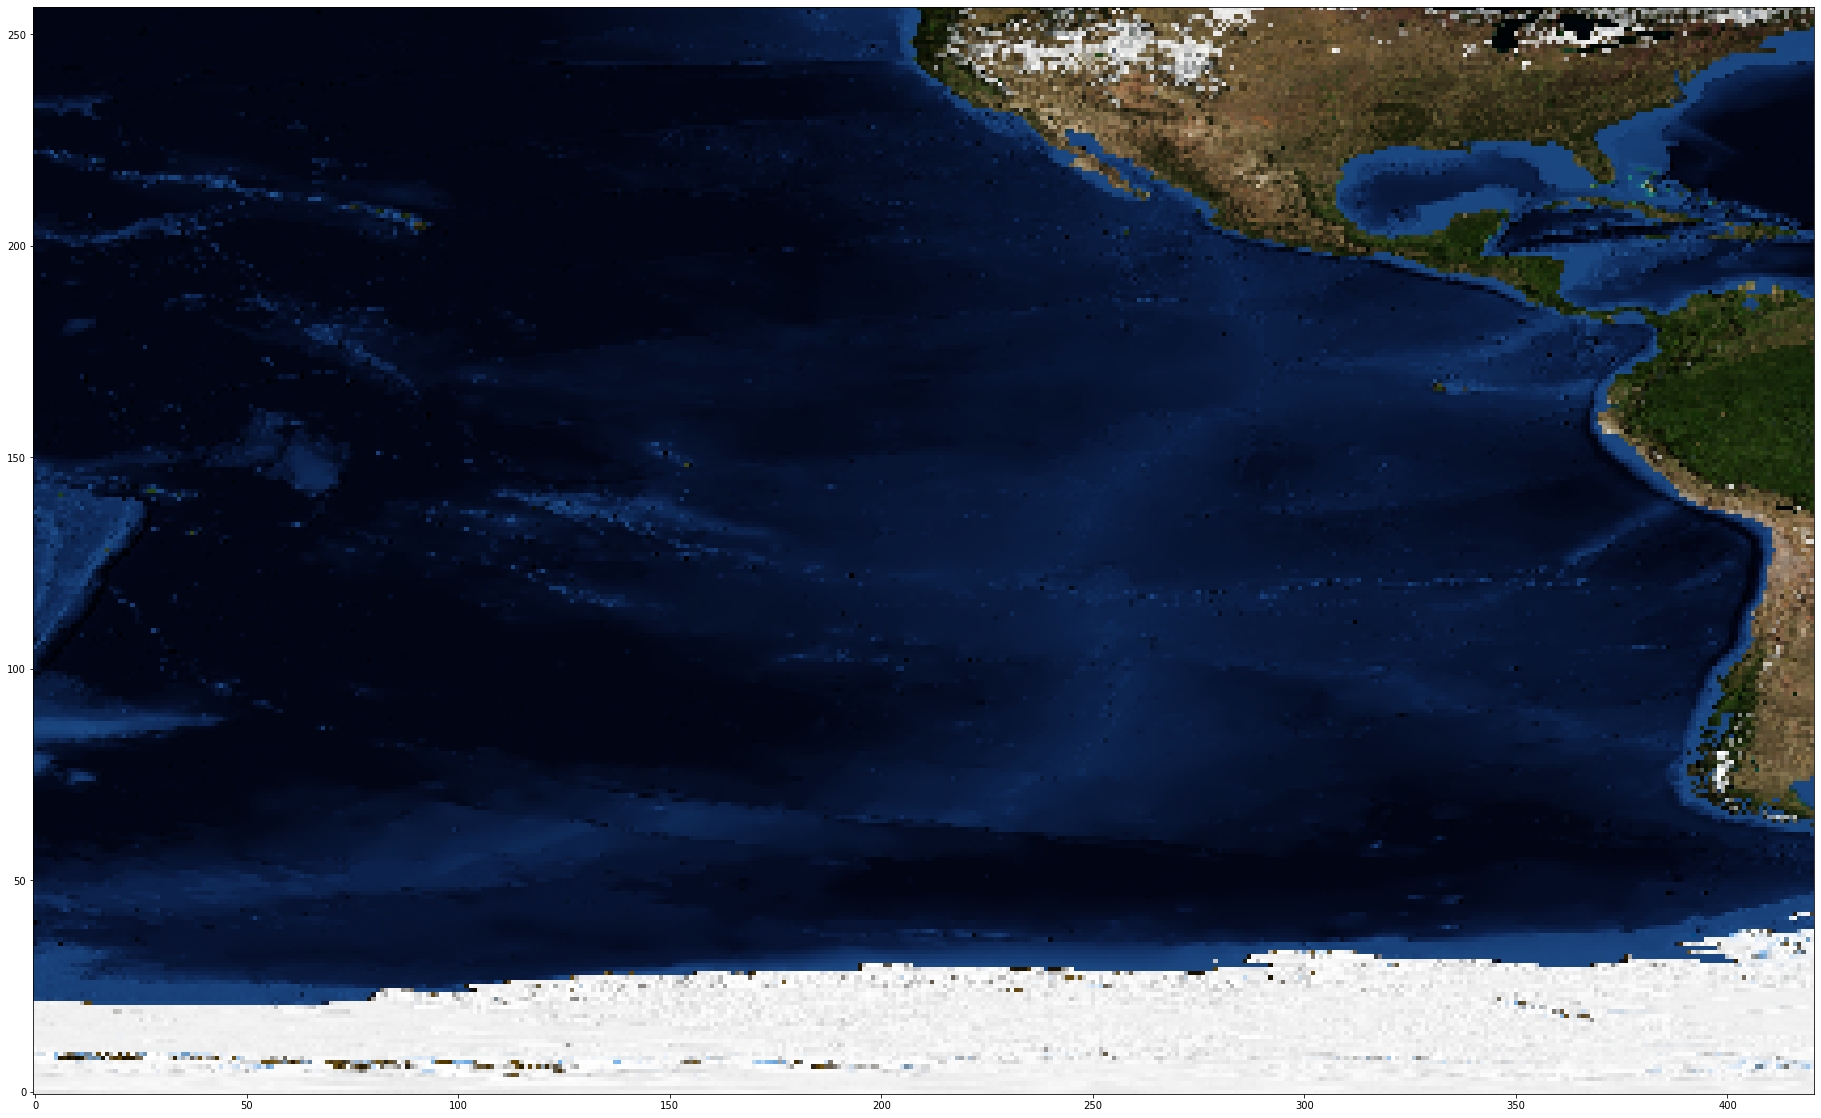

CPU times: user 543 ms, sys: 121 ms, total: 663 ms
Wall time: 476 ms


In [72]:
%%time
ds = xr.open_dataset("http://atlantis.sci.utah.edu/mod_visus?dataset=BlueMarble",engine=OpenVisusBackendEntrypoint)
# data[time,resolution,y,x,channel]
data=ds.data[10,29,20:33000,20:27000,:].values
ShowData(data)


### Opening dataset with Openvisus alone

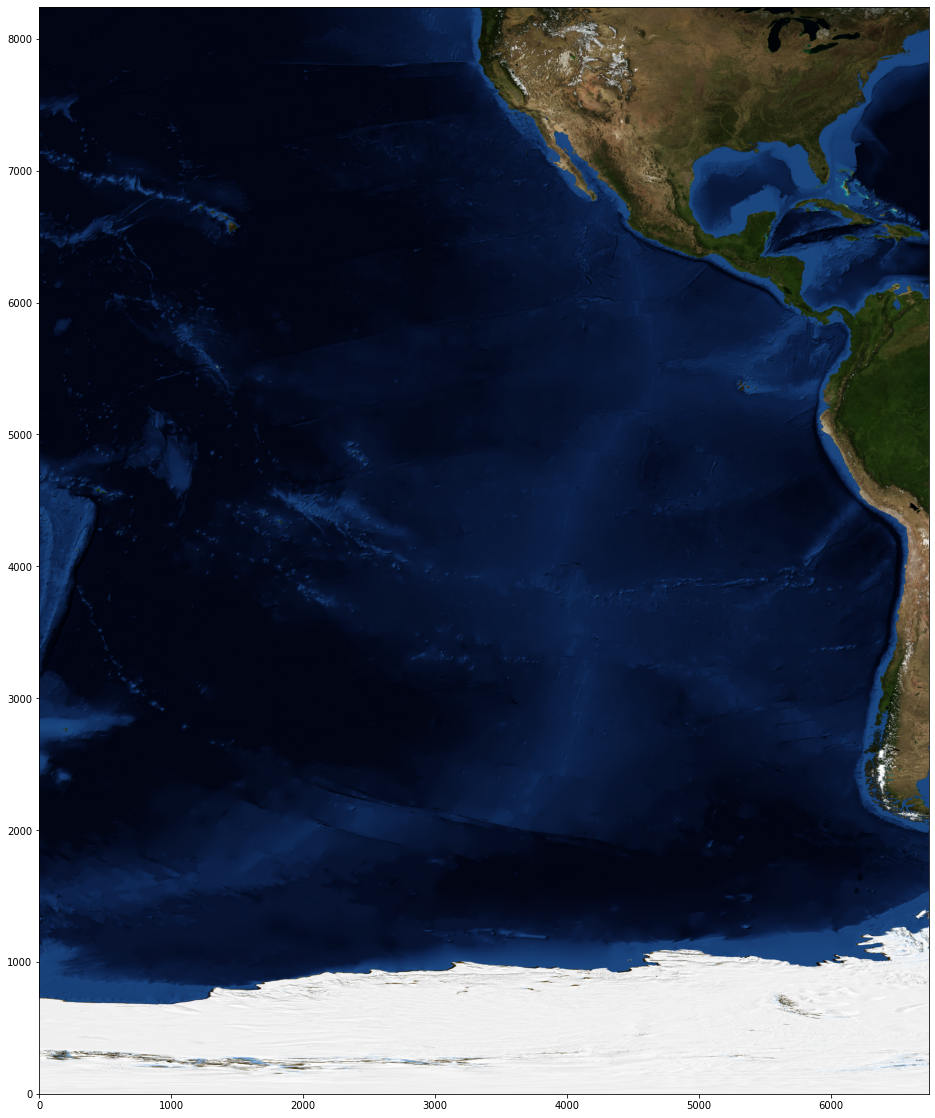

CPU times: user 16.9 s, sys: 5.34 s, total: 22.3 s
Wall time: 22.1 s


In [49]:
%%time
db=LoadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=BlueMarble")
data=db.read(time=10,logic_box=[(20,20),(27000,33000)],max_resolution=29)
ShowData(data)

## The runtime analysis shows that both openvisus and openvisus with xarray have very similar CPU runtime for smaller datasets.

### Another example 

[4, 32, 70416, 29280, 3]
Adding field data shape [4, 32, 70416, 29280, 3] dtype uint8 labels ['time', 'resolution', 'y', 'x', 'channel'] timesteps [0, 1, 2, 3] Max Resolution 32
_raw_indexing_method key (3, 30, slice(0, 70000, 1), slice(0, 29000, 1), slice(None, None, None))


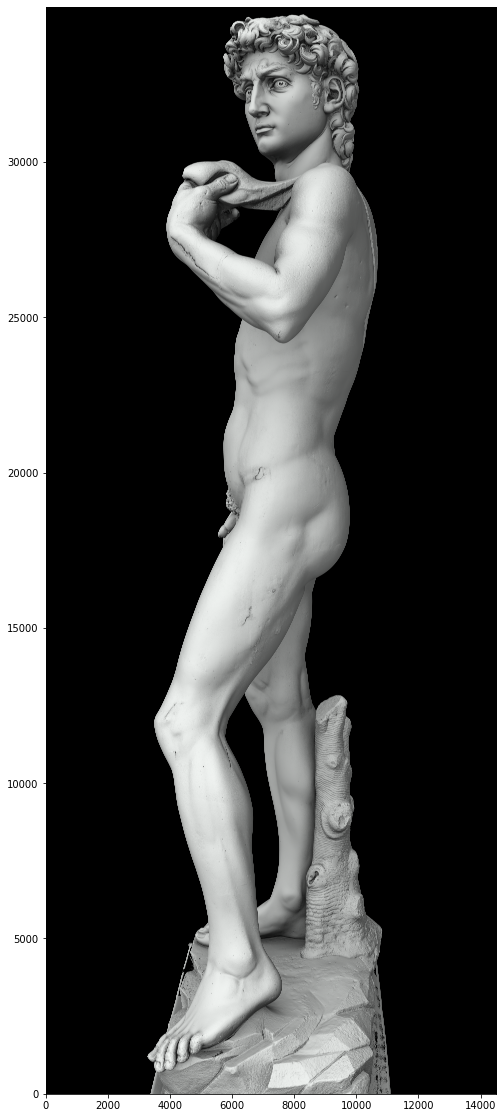

CPU times: user 2min 5s, sys: 45.1 s, total: 2min 51s
Wall time: 2min 51s


In [57]:
%%time
db=xr.open_dataset('http://atlantis.sci.utah.edu/mod_visus?dataset=david_subsampled', engine=OpenVisusBackendEntrypoint)
"""
Using sel() method from Xarray on OpenVisus to slice up the data and select certain certain range values of x and y
"""
#ShowData(db.sel(x=slice(10000,11000),y=slice(10000,11000),time=slice(0,1)).data.values)
data=db.data[3,30,:70000,:29000,:].values
ShowData(data)



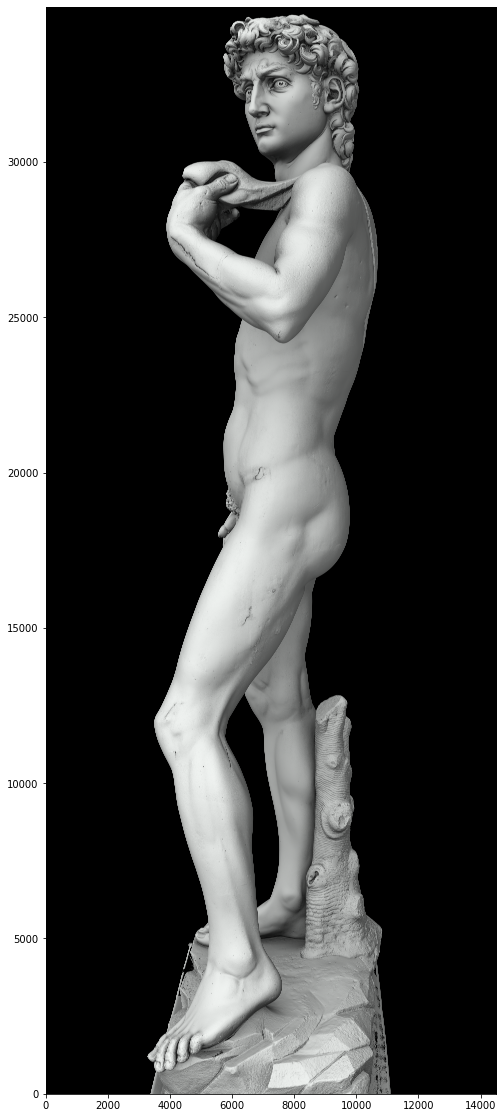

CPU times: user 2min 5s, sys: 45.6 s, total: 2min 51s
Wall time: 2min 51s


In [58]:
%%time
db=LoadDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=david_subsampled")
data=db.read(time=3,logic_box=[(0,0),(29000,70000)],max_resolution=30)
ShowData(data)

### Very similar runtime observed with this dataset too

In [104]:
%%time
db2=xr.open_dataset('http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1', engine=OpenVisusBackendEntrypoint)
select_db2=db2.sel(x=slice(0,2048),y=slice(0,2048),z=slice(1024,1025)).to_array()
# data=db2.data[:2048,:2048,1024:1025,:].values
ShowData(select_db2[0][0].values)

[2048, 2048, 2048]
Adding field DATA shape [2048, 2048, 2048] dtype uint8 labels ['z', 'y', 'x'] timesteps [0] Max Resolution 33
_raw_indexing_method key (slice(1024, 1025, 1), slice(0, 8, 1), slice(0, 8, 1))


IndexError: tuple index out of range

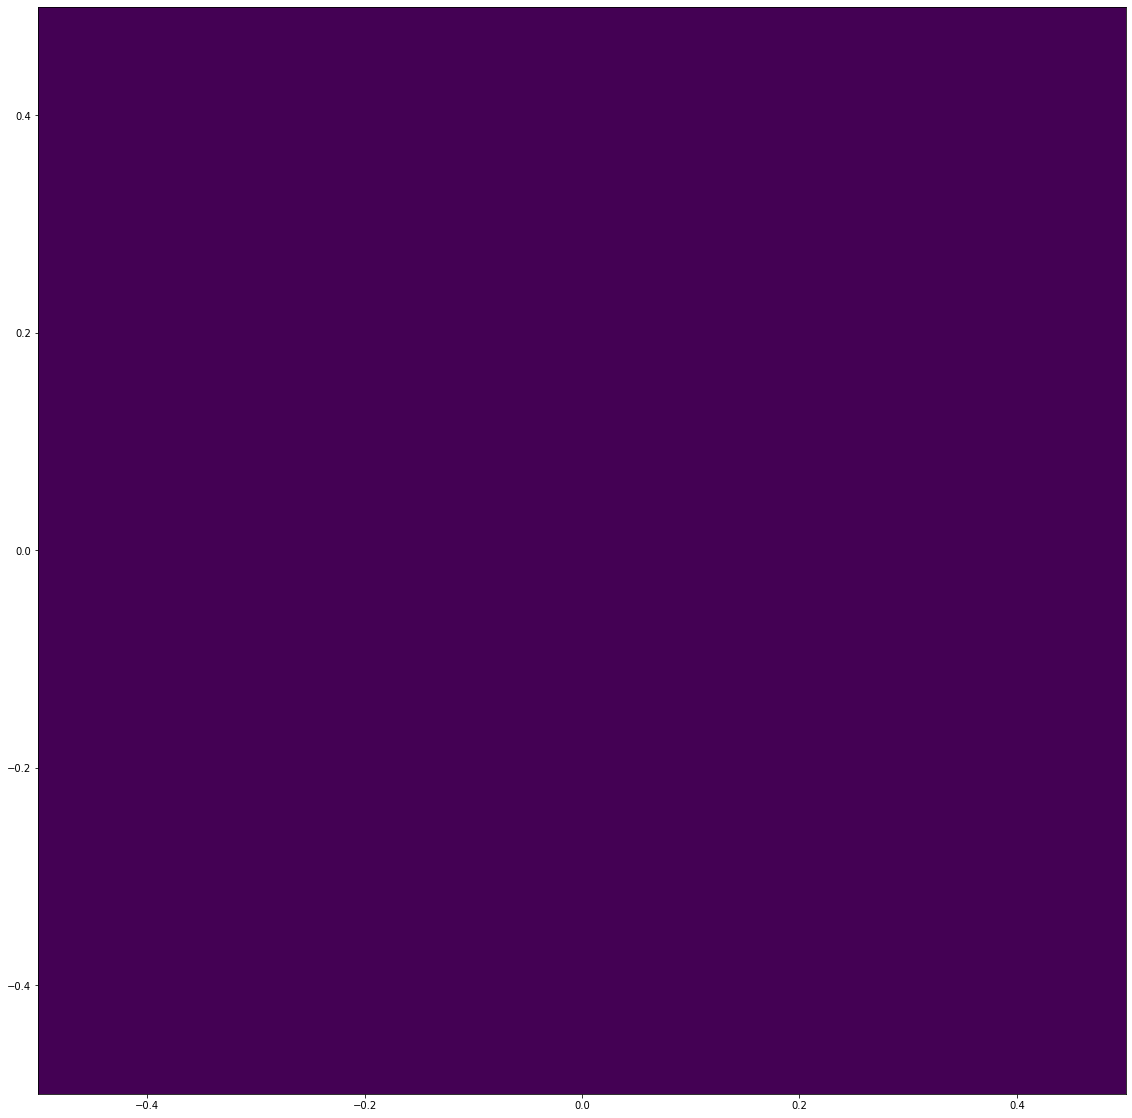

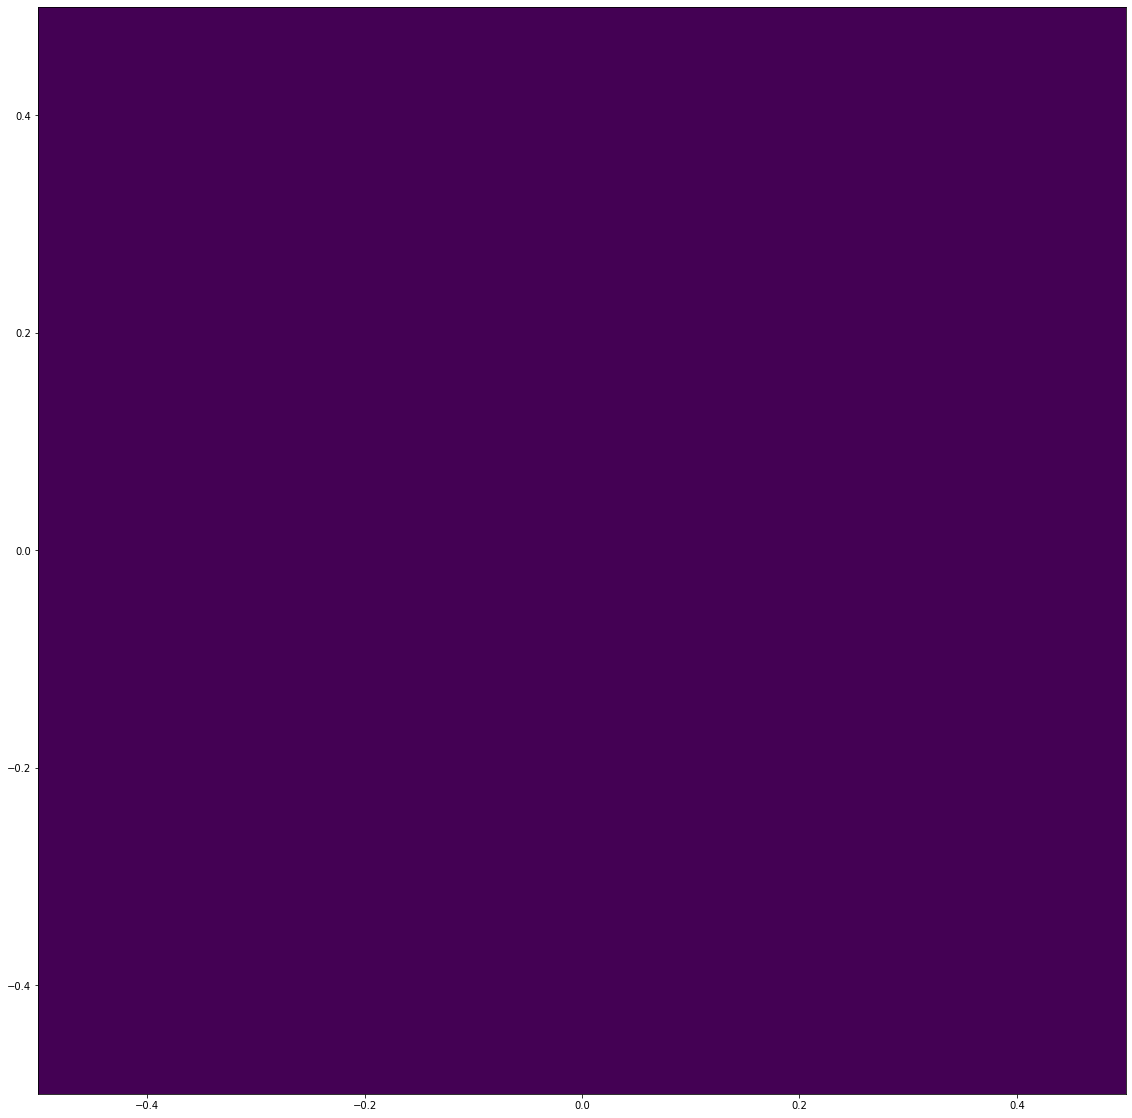

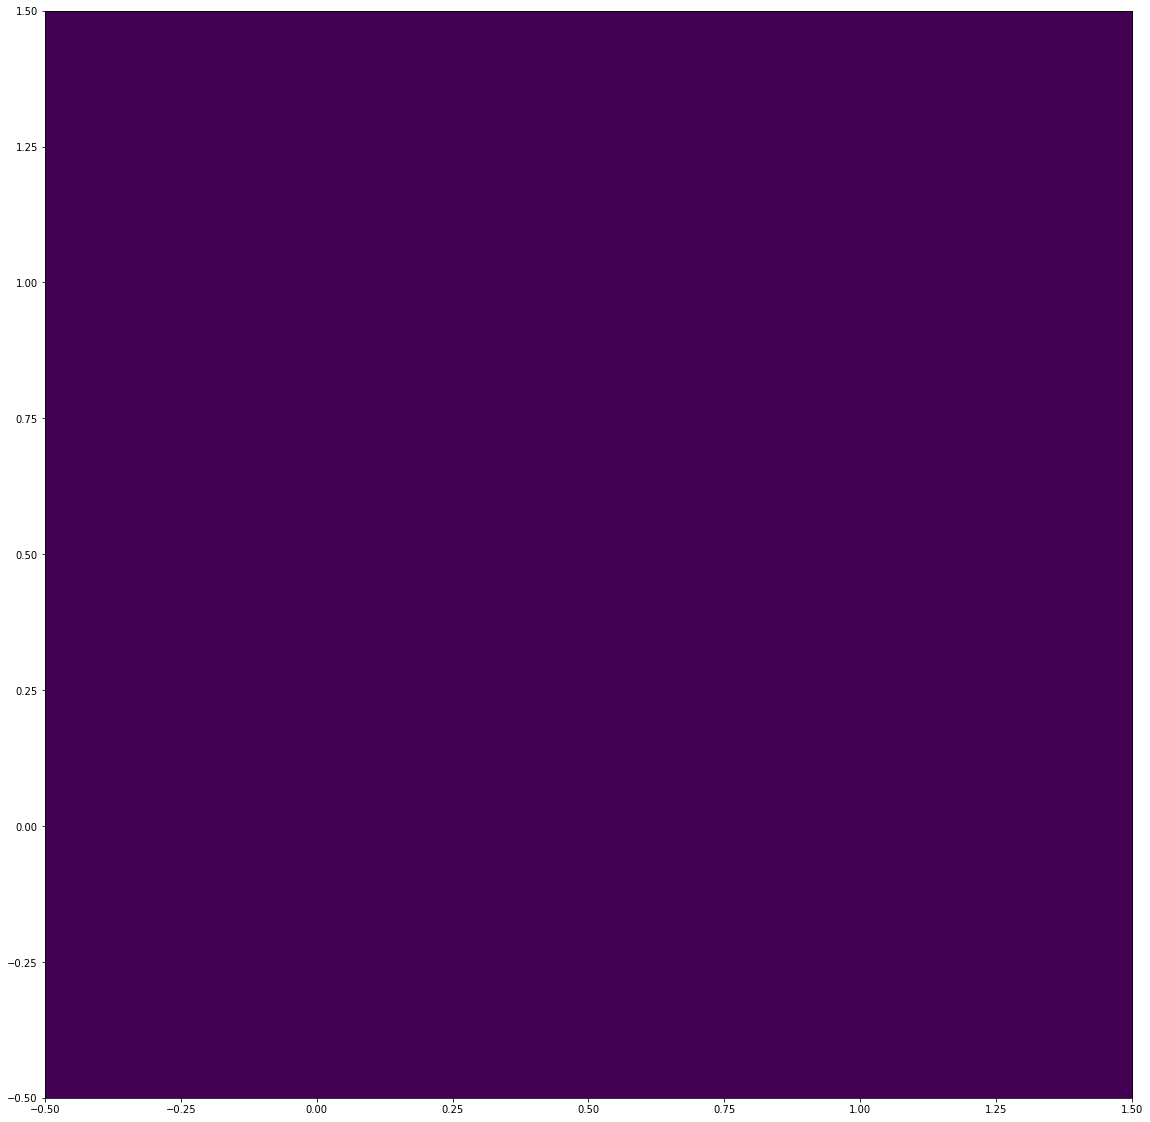

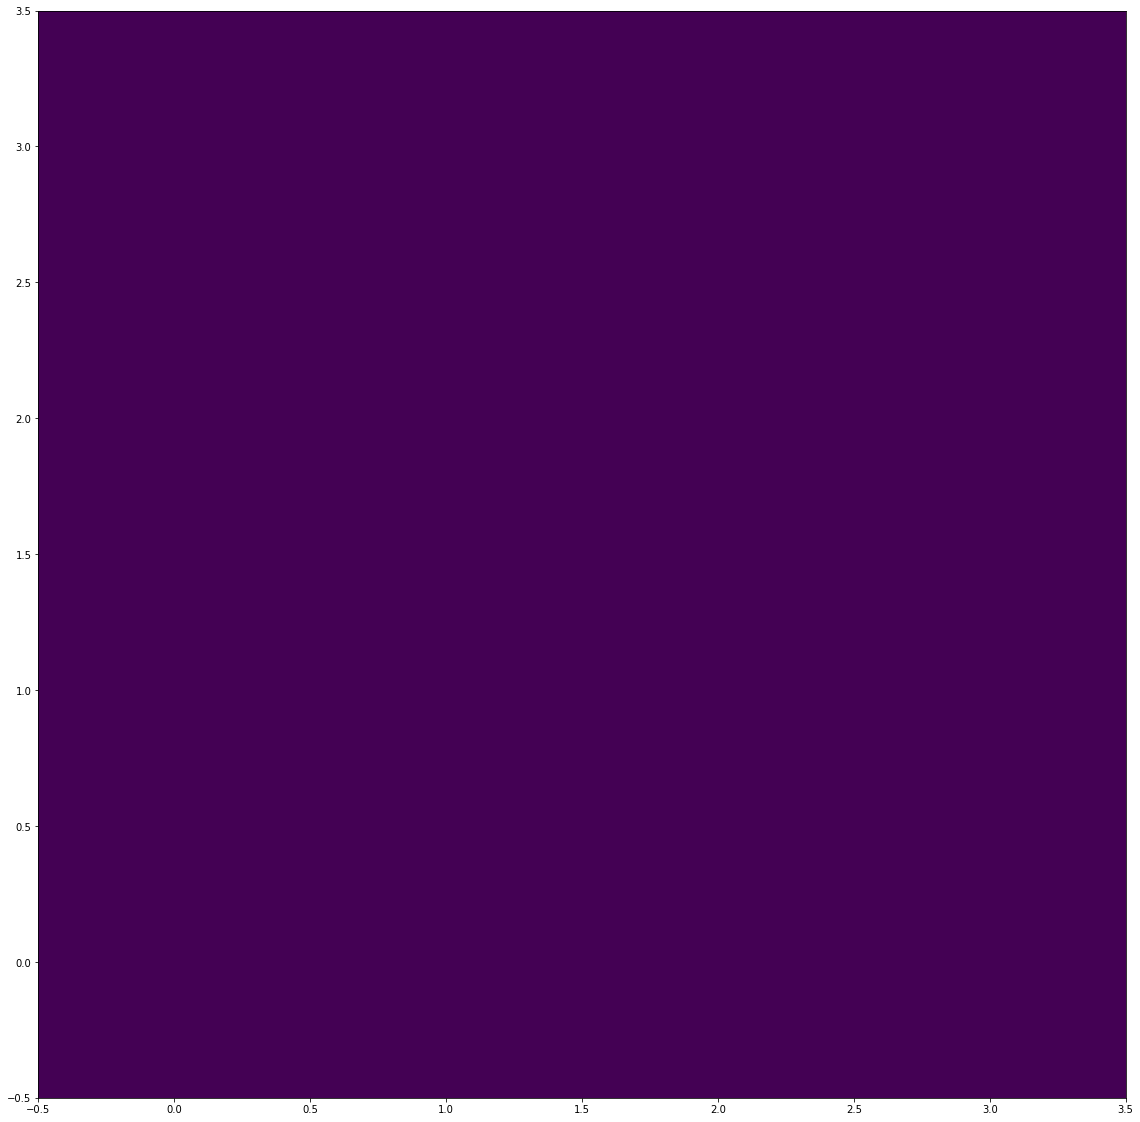

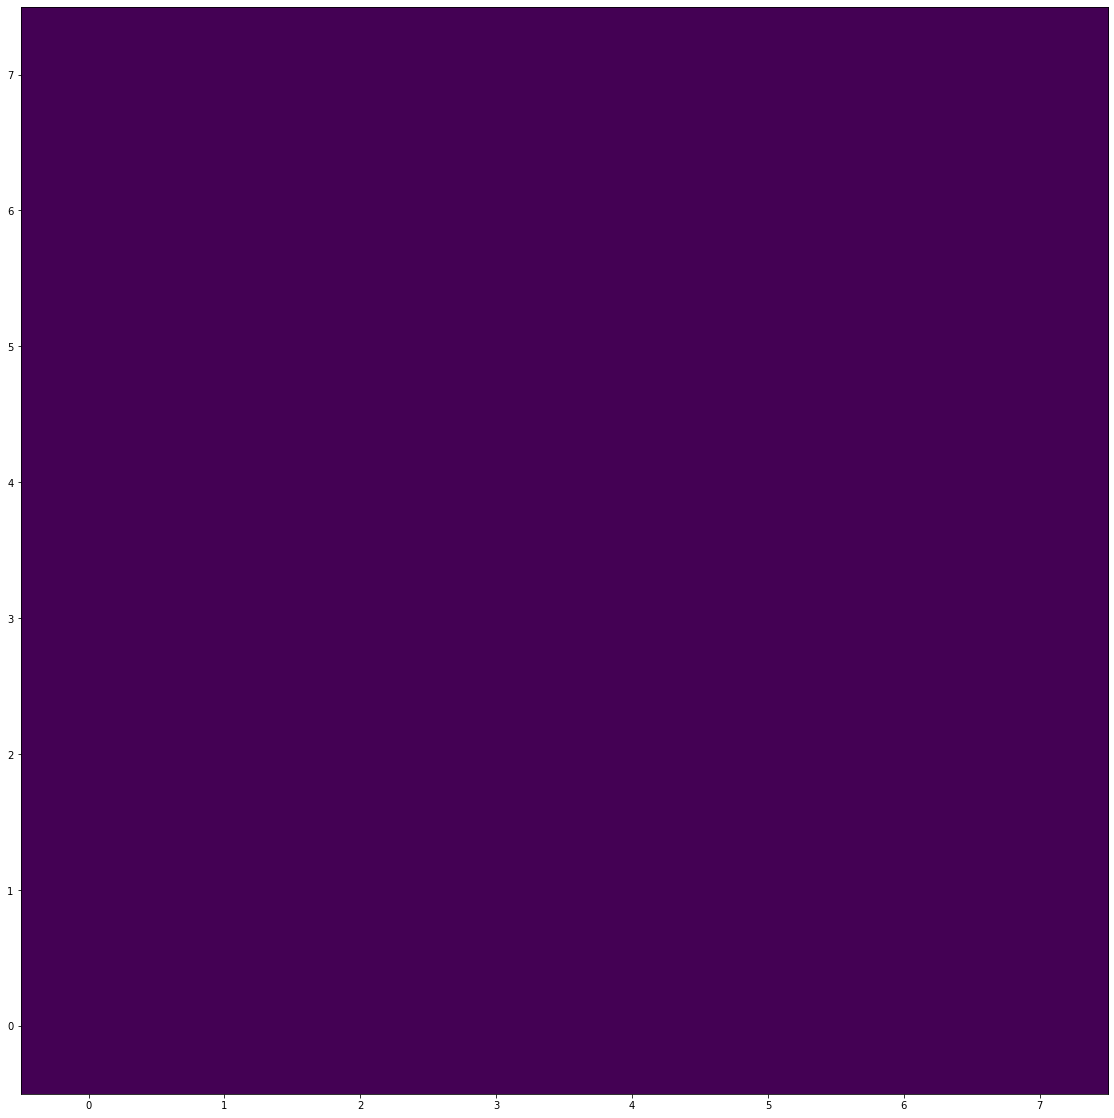

In [103]:
db=LoadDataset('http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1')
for data in db.read(x=[0,2048],y=[0,2048],z=[1024,1025], num_refinements=5, quality=0):
    ShowData(data[0,:,:])